# 3. Merging Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
sns.set(style='ticks', font_scale=1.3)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Load in Penn World Tables

Let's start by loading in the Penn World Tables Data

In [4]:
pwt = pd.read_excel('data/pwt90.xlsx', sheet_name='Data')
pwt = pwt[['year', 'countrycode', 'rgdpna', 'pop', 'hc', 'avh']].dropna()
pwt.head()

,year,countrycode,rgdpna,pop,hc,avh
325,1950,ARG,153269.500000,17.158029,1.816503,2034.000000
326,1951,ARG,162321.859375,17.525200,1.830769,2037.866753
327,1952,ARG,152653.734375,17.884976,1.845147,2041.740856
328,1953,ARG,159095.500000,18.238994,1.859638,2045.622325
329,1954,ARG,164275.734375,18.588894,1.874243,2049.511172


## Load in World Bank inequality data

Now we load in a second dataset that we wish to merge with the PWT. Here we will use the World Bank data on global inequality, which has Gini coefficient data for a larget set of countries over many years.

In [5]:
gini = pd.read_excel('data/world_bank_gini.xls')
gini.head()

,countrycode,year,gini
0,AGO,2008,42.7
1,ALB,1996,27.0
2,ALB,2002,31.7
3,ALB,2005,30.6
4,ALB,2008,30.0


We can see that the World Bank data doesn't appear every year for many countries.

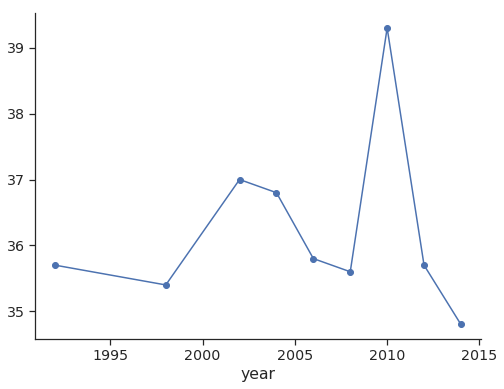

In [53]:
gini_pan = gini.pivot('year', 'countrycode')['gini']
gini_pan['VNM'].dropna().plot(marker='o');

## Merge the two together

Finally, we want to merge these two together. To do this, we will match any rows that have the same value for both `year` and `countrycode`.

In [7]:
full = pd.merge(pwt, gini, how='left', on=('year', 'countrycode'))
full.head()

,year,countrycode,rgdpna,pop,hc,avh,gini
0,1950,ARG,153269.500000,17.158029,1.816503,2034.000000,NaN
1,1951,ARG,162321.859375,17.525200,1.830769,2037.866753,NaN
2,1952,ARG,152653.734375,17.884976,1.845147,2041.740856,NaN
3,1953,ARG,159095.500000,18.238994,1.859638,2045.622325,NaN
4,1954,ARG,164275.734375,18.588894,1.874243,2049.511172,NaN


Now we can see how the Gini coefficient relates to other variables, like GDP per capita

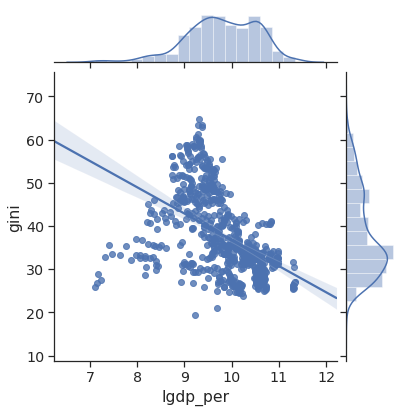

In [50]:
full['lgdp_per'] = np.log(full['rgdpna']/full['pop'])
sns.jointplot('lgdp_per', 'gini', kind='reg', data=full);